In [2]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

import scipy.constants as constants

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [3]:
# Eulerian: 2x2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_2x25_eulerian_final/OutputDir'

NcFile3   = Dataset(FILEDIR3+'/GEOSChem.SpeciesConc.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')
lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU'][:,:,:,:]

NcFile33   = Dataset(FILEDIR3+'/GEOSChem.StateMet.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')
GC_V33 = NcFile33.variables['Met_AIRVOL'][:,:]
GC_V33 = GC_V33*1e6 # [m3]=>[cm3]

GC_AD33 = NcFile33.variables['Met_AD'][:,:,:,:] # [kg]
GC_AD33 = GC_AD33*1000.0/28.97 # change [kg] to [mol]

In [4]:
# (1) GEOS-Chem

# 3-D entropy
Nt = len(EU3[:,0,0,0])
k  = constants.k
print(f'Boltzmann constant={k}')


# entropy
Entropy3d_EU3 = []

for it in range(Nt):
    S_EU3 = -k*np.sum( GC_AD33[it,:,:,:]*EU3[it,:,:,:]* np.log(EU3[it,:,:,:], out=np.zeros_like(EU3[it,:,:,:]), \
                                                           where=(EU3[it,:,:,:]!=0)), axis=(0,1,2) )
   
    Entropy3d_EU3.append(S_EU3)

    
print(Entropy3d_EU3)

Boltzmann constant=1.380649e-23
[1.89428002911456e-15, 3.8000850533696e-15, 5.69934027876864e-15, 7.605872076657281e-15, 9.54828749431552e-15, 1.148327700848832e-14, 1.342832825076544e-14, 1.539944349531648e-14, 1.7374984769205762e-14, 1.9358650002714883e-14, 2.13736217284288e-14, 2.340729959131392e-14, 2.54206949472256e-14, 2.7446819666013443e-14, 2.9462839359544324e-14, 3.1464648750855684e-14, 3.348232787403264e-14, 3.5511292532587524e-14, 3.753973762531072e-14, 3.957215898715392e-14, 4.1634524306316805e-14, 4.3665001714368e-14, 4.5725479631121924e-14, 4.779239733661952e-14, 4.9837362502113286e-14, 5.185820850274048e-14, 5.392144683387904e-14, 5.596832414301184e-14, 5.798977807100672e-14, 6.001796161358336e-14]


In [5]:
# 1km
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/Sensitive_test/Initial_plume_length/gc_2x25_lagrange_10km'

# 2km
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/Sensitive_test/Initial_plume_length/gc_2x25_lagrange_20km'

# 5km
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/Sensitive_test/Initial_plume_length/gc_2x25_lagrange_40km'

# 10km
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/Sensitive_test/Initial_plume_length/gc_2x25_lagrange_60km'


In [6]:
days = np.arange(1,32,1)

df10_life    = pd.read_fwf(FILEDIR1+'/Plume_lifetime_seconds.txt', header=None)
df10_number  = pd.read_fwf(FILEDIR1+'/Plume_number.txt', header=None)
df10_entropy = pd.read_fwf(FILEDIR1+'/Plume_entropy.txt', header=None)

Num1_plume = df10_number.loc[:,3]
Num1_2D = df10_number.loc[:,1]
Num1_1D = df10_number.loc[:,0]
Num1_dissolved = df10_number.loc[:,2]
lifetime1 = df10_life.loc[:,2]/(24*3600)
entropy1 = df10_entropy.loc[:,2]


df20_life   = pd.read_fwf(FILEDIR2+'/Plume_lifetime_seconds.txt', header=None, sep=' ')
df20_number = pd.read_fwf(FILEDIR2+'/Plume_number.txt', header=None)
df20_entropy = pd.read_fwf(FILEDIR2+'/Plume_entropy.txt', header=None)

Num2_plume = df20_number.loc[:,3]
Num2_2D = df20_number.loc[:,1]
Num2_1D = df20_number.loc[:,0]
Num2_dissolved = df20_number.loc[:,2]
lifetime2 = df20_life.loc[:,2]/(24*3600)
entropy2 = df20_entropy.loc[:,2]


df30_life   = pd.read_fwf(FILEDIR3+'/Plume_lifetime_seconds.txt', header=None)
df30_number = pd.read_fwf(FILEDIR3+'/Plume_number.txt', header=None)
df30_entropy = pd.read_fwf(FILEDIR3+'/Plume_entropy.txt', header=None)

Num3_plume = df30_number.loc[:,3]
Num3_2D = df30_number.loc[:,1]
Num3_1D = df30_number.loc[:,0]
Num3_dissolved = df30_number.loc[:,2]
lifetime3 = df30_life.loc[:,2]/(24*3600)
entropy3 = df30_entropy.loc[:,2]


df40_life   = pd.read_fwf(FILEDIR4+'/Plume_lifetime_seconds.txt', header=None)
df40_number = pd.read_fwf(FILEDIR4+'/Plume_number.txt', header=None)
df40_entropy = pd.read_fwf(FILEDIR4+'/Plume_entropy.txt', header=None)

Num4_plume = df40_number.loc[:,3]
Num4_2D = df40_number.loc[:,1]
Num4_1D = df40_number.loc[:,0]
Num4_dissolved = df40_number.loc[:,2]
lifetime4 = df40_life.loc[:,2]/(24*3600)
entropy4 = df40_entropy.loc[:,2]


In [7]:
df10_life.loc[:,1].value_counts()

22    32771
11      655
44      215
Name: 1, dtype: int64

In [8]:
df20_life.loc[:,1].value_counts()

22    17073
11    16465
44     4796
Name: 1, dtype: int64

In [9]:
df30_life.loc[:,1].value_counts()

22    15051
11    12052
44     1820
Name: 1, dtype: int64

In [10]:
df40_life.loc[:,1].value_counts()

22    14038
11     8251
44     1964
Name: 1, dtype: int64

60038 67842 40518


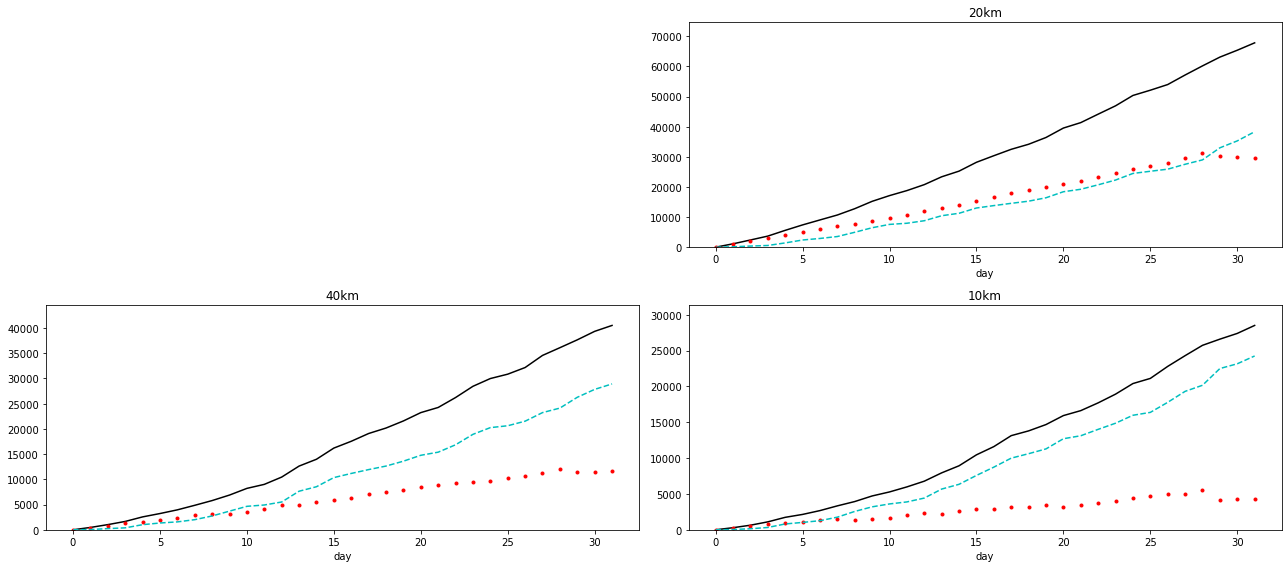

In [11]:
fig = plt.figure(figsize=(18,8));
#     gs = fig.add_gridspec(15, 8)

# ax1 = plt.subplot(2,2,1);
# ax1.plot(Num1_plume, 'k', label='Total plume')
# ax1.plot(Num1_1D+Num1_2D, 'r', label='active plume')
# ax1.plot(Num1_dissolved, 'c--', label='dissolved plume')
# ax1.legend(loc='upper left')
# ax1.set_title('1km')
# ax1.set_xlabel('day');
# ax1.set_ylabel('plume number')
# ax1.set_ylim(0,max(Num1_plume)*1.1)


ax2 = plt.subplot(2,2,2);
ax2.plot(Num2_plume, 'k', label='Total plume')
ax2.plot(Num2_1D+Num2_2D, 'r.', label='active plume')
ax2.plot(Num2_dissolved, 'c--', label='dissolved plume')
# ax2.legend()
ax2.set_title('20km')
ax2.set_xlabel('day');
# ax2.set_ylabel('plume number')
ax2.set_ylim(0,max(Num2_plume)*1.1)


ax3 = plt.subplot(2,2,3);
ax3.plot(Num3_plume, 'k', label='Total plume')
ax3.plot(Num3_1D+Num3_2D, 'r.', label='active plume')
ax3.plot(Num3_dissolved, 'c--', label='dissolved plume')
# ax3.legend(loc='upper right')
ax3.set_title('40km')
ax3.set_xlabel('day');
# ax3.set_ylabel('plume number')
ax3.set_ylim(0,max(Num3_plume)*1.1)



ax4 = plt.subplot(2,2,4);
ax4.plot(Num4_plume, 'k', label='Total plume')
ax4.plot(Num4_1D+Num4_2D, 'r.', label='active plume')
ax4.plot(Num4_dissolved, 'c--', label='dissolved plume')
# ax4.legend(loc='upper right')
ax4.set_title('10km')
ax4.set_xlabel('day');
# ax4.set_ylabel('plume number')
ax4.set_ylim(0,max(Num4_plume)*1.1)



# plt.title('(a) Number of plumes in different types')
plt.xlabel('day');
# plt.ylabel('number')
plt.tight_layout()

print(max(Num1_plume), max(Num2_plume), max(Num3_plume))

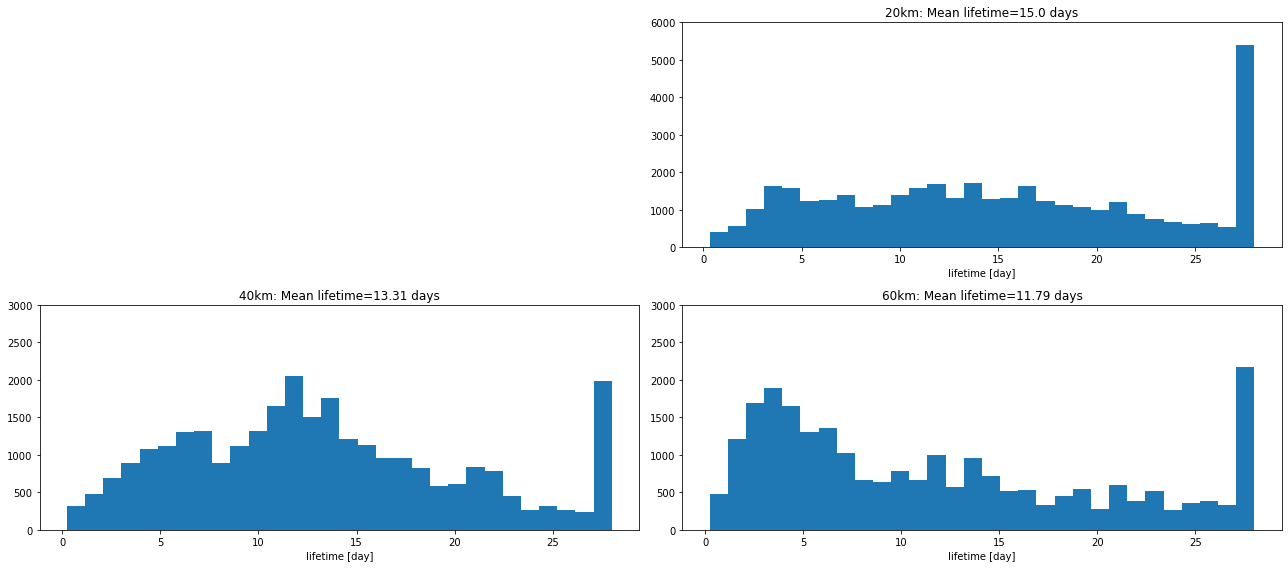

In [12]:
fig = plt.figure(figsize=(18,8));
#     gs = fig.add_gridspec(15, 8)

# max_num = 3e3
# ax1 = plt.subplot(2,2,1);
# ax1.hist(lifetime1, bins=30, label='1km')
# ax1.set_ylim(0,max_num)
# ax1.set_title(f'10km: Mean lifetime={np.mean(lifetime1):0.1f} days');
# ax1.set_xlabel('lifetime [day]');
# ax1.set_ylabel('plume number');


max_num = 6e3
ax2 = plt.subplot(2,2,2);
ax2.hist(lifetime2, bins=30, label='2km')
ax2.set_ylim(0,max_num)
ax2.set_title(f'20km: Mean lifetime={np.mean(lifetime2):0.1f} days');
ax2.set_xlabel('lifetime [day]');
# ax2.set_ylabel('plume number');


max_num = 3e3
ax3 = plt.subplot(2,2,3);
ax3.hist(lifetime3, bins=30, label='5km')
ax3.set_ylim(0,max_num)
ax3.set_title(f'40km: Mean lifetime={np.mean(lifetime3):0.2f} days');
ax3.set_xlabel('lifetime [day]');
# ax3.set_ylabel('plume number');


max_num = 3e3
ax4 = plt.subplot(2,2,4);
ax4.hist(lifetime4, bins=30, label='10km')
ax4.set_ylim(0,max_num)
ax4.set_title(f'60km: Mean lifetime={np.mean(lifetime4):0.2f} days');
ax4.set_xlabel('lifetime [day]');
# ax4.set_ylabel('plume number');

plt.tight_layout()

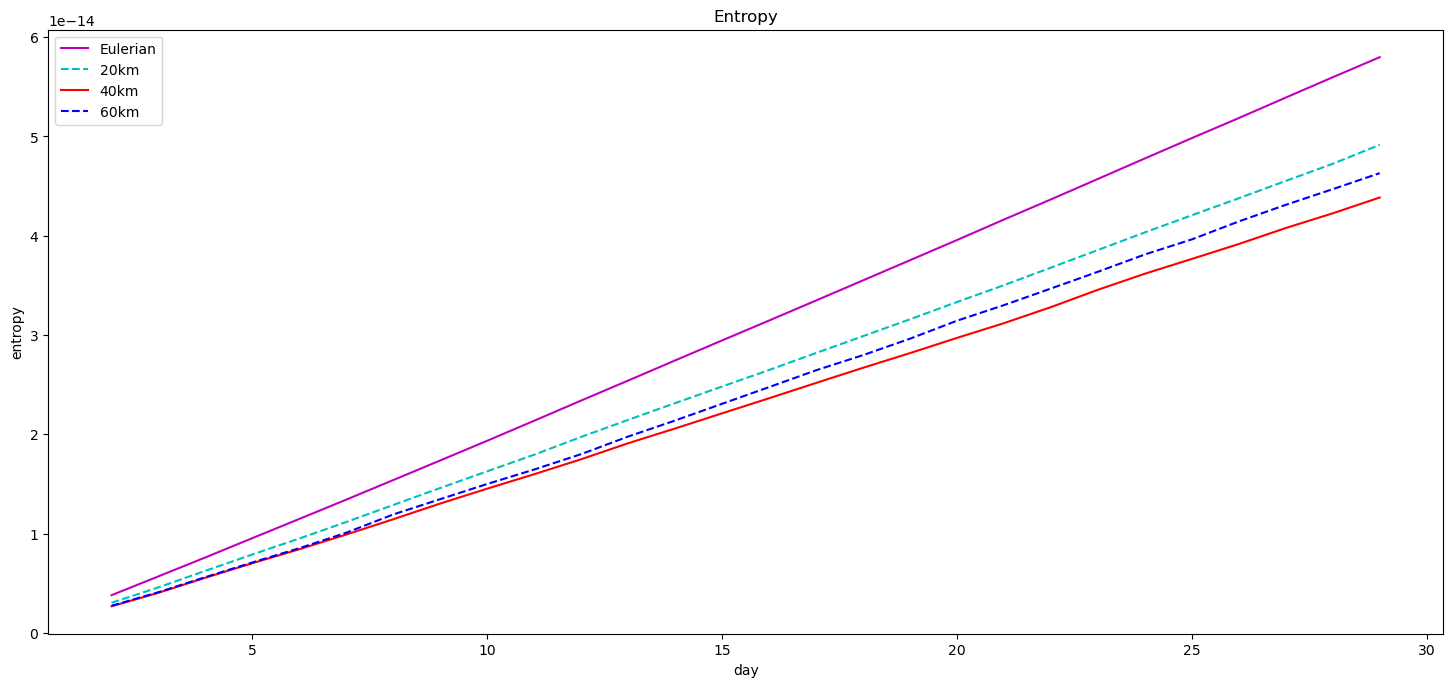

In [13]:
fig = plt.figure(figsize=(18,8), dpi=100);

begin = 1
end = 30

Days = np.arange(begin+1,end,1)

ax1 = plt.subplot(1,1,1);

ax1.plot(Days, Entropy3d_EU3[begin:end-1], 'm', label='Eulerian')

# ax1.plot(Days, entropy1[begin+1:end], 'k', label='10km')
ax1.plot(Days, entropy2[begin+1:end], 'c--', label='20km')
ax1.plot(Days, entropy3[begin+1:end], 'r', label='40km')
ax1.plot(Days, entropy4[begin+1:end], 'b--', label='60km')


ax1.legend(loc='upper left')
ax1.set_title('Entropy')
ax1.set_xlabel('day');
ax1.set_ylabel('plume number')
# ax1.set_ylim(0,max(Num1_plume)*1.1)


# plt.title('(a) Number of plumes in different types')
plt.xlabel('day');
plt.ylabel('entropy');

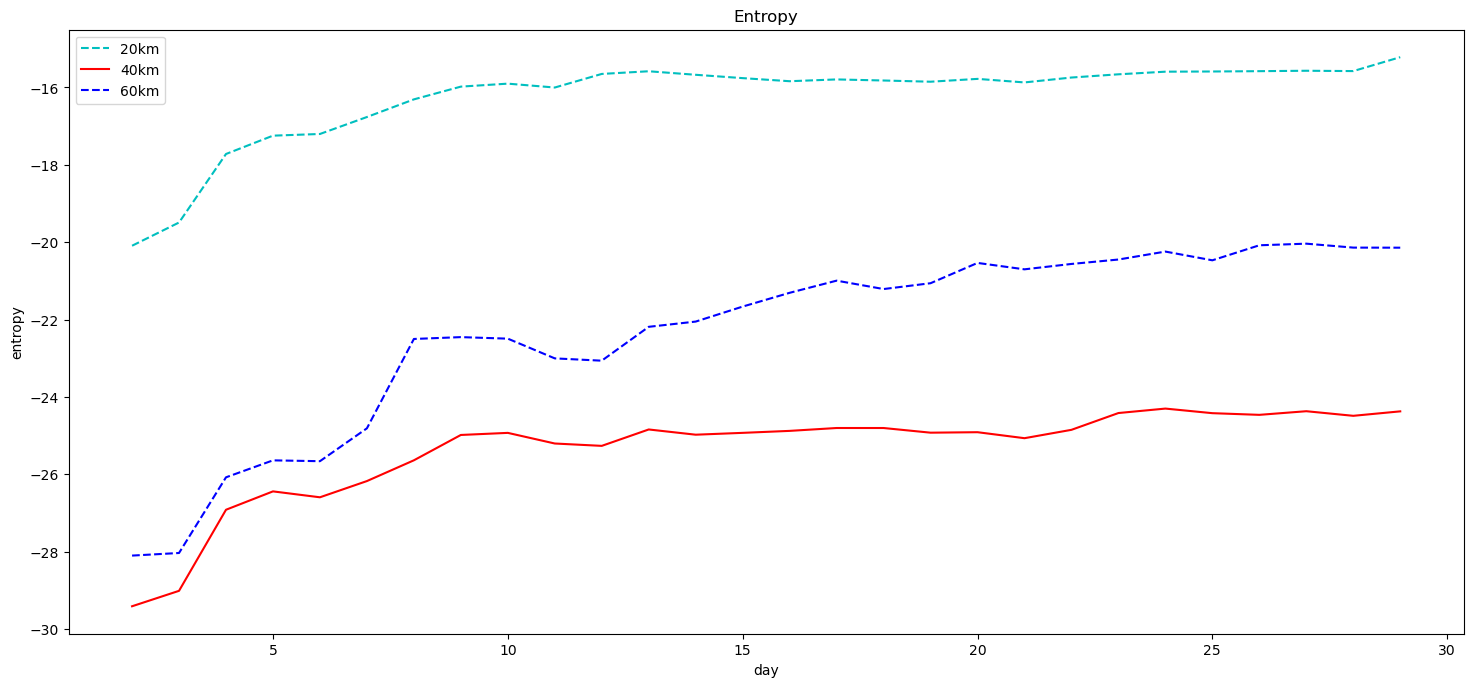

In [14]:
fig = plt.figure(figsize=(18,8), dpi=100);

begin = 1
end = 30

Days = np.arange(begin+1,end,1)

ax1 = plt.subplot(1,1,1);

# ax1.plot(Days, Entropy3d_EU3[begin:end-1], 'm', label='Eulerian')

# ax1.plot(Days, 100*(entropy1[begin+1:end]-Entropy3d_EU3[begin:end-1])/Entropy3d_EU3[begin:end-1], 'k', label='10km')
ax1.plot(Days, 100*(entropy2[begin+1:end]-Entropy3d_EU3[begin:end-1])/Entropy3d_EU3[begin:end-1], 'c--', label='20km')
ax1.plot(Days, 100*(entropy3[begin+1:end]-Entropy3d_EU3[begin:end-1])/Entropy3d_EU3[begin:end-1], 'r', label='40km')
ax1.plot(Days, 100*(entropy4[begin+1:end]-Entropy3d_EU3[begin:end-1])/Entropy3d_EU3[begin:end-1], 'b--', label='60km')


ax1.legend(loc='upper left')
ax1.set_title('Entropy')
ax1.set_xlabel('day');
ax1.set_ylabel('plume number')
# ax1.set_ylim(0,max(Num1_plume)*1.1)


# plt.title('(a) Number of plumes in different types')
plt.xlabel('day');
plt.ylabel('entropy');

In [15]:
Length3 = df30_life.loc[:,0]

(array([1.5339e+04, 9.7770e+03, 2.8220e+03, 6.1600e+02, 1.7600e+02,
        7.6000e+01, 3.8000e+01, 2.2000e+01, 1.3000e+01, 5.0000e+00,
        9.0000e+00, 9.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.25411818e-01, 2.11278512e+01, 4.21302907e+01, 6.31327301e+01,
        8.41351695e+01, 1.05137609e+02, 1.26140048e+02, 1.47142488e+02,
        1.68144927e+02, 1.89147367e+02, 2.10149806e+02, 2.31152245e+02,
        2.52154685e+02, 2.73157124e+02, 2.94159564e+02, 3.15162003e+02,
        3.36164442e+02, 3.57166882e+02, 3.78169321e+02, 3.99171761e+02,
        4.20174200e+02, 4.41176640e+02, 4.62179079e+02, 4.83181518e+02,
        5.04183958e+02, 5.25186397e+02, 5.46188837e+02, 5.67191276e+02,
        5.88193715e+02, 6.09196155e+02, 6.30198594e+02]),
 <BarContainer object of 30 

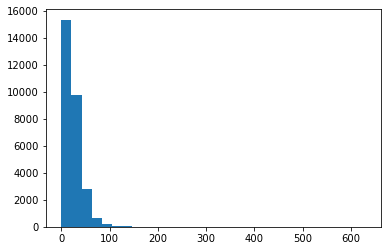

In [16]:
plt.hist(Length3, bins=30, label='20km')

In [17]:
max(Length3)

630.198594317097

In [18]:
lifetime3

0         0.444444
1         0.479167
2         0.291667
3         0.291667
4         0.319444
           ...    
28918    23.236111
28919    23.236111
28920    28.006944
28921    28.006944
28922    28.006944
Name: 2, Length: 28923, dtype: float64

In [19]:
a = Length3[Length3<0.4]
len(a), len(Length3),  len(a)/len(Length3)

(65, 28923, 0.002247346402517028)

In [20]:
a = Length3[Length3>400]
len(a), len(Length3),  len(a)/len(Length3)

(6, 28923, 0.00020744736023234104)

In [21]:
a = df30_life[Length3<2]
a

,0,1,2,3
7848,1.924830,11,1105200.0,666
7854,1.954469,11,1105800.0,85
8913,1.854632,11,1185000.0,850
9916,1.973335,11,1222800.0,376
10864,1.911592,11,1312800.0,864
...,...,...,...,...
28461,1.685755,44,2419800.0,900
28462,1.646984,44,2419800.0,906
28471,1.784936,44,2419800.0,170
28485,1.756756,44,2419800.0,216


In [22]:
a.head(60)

,0,1,2,3
7848,1.924830,11,1105200.0,666
7854,1.954469,11,1105800.0,85
8913,1.854632,11,1185000.0,850
9916,1.973335,11,1222800.0,376
10864,1.911592,11,1312800.0,864
10872,1.898470,11,1313400.0,432
11018,1.966729,11,1323000.0,932
11252,1.930799,11,1351200.0,216
11259,1.921834,11,1351800.0,520
11810,1.467742,11,1404600.0,210


In [23]:
a.tail(60)

,0,1,2,3
28007,0.600900,44,2419800.0,818
28008,1.421711,44,2419800.0,133
28009,0.855947,44,2419800.0,989
28010,1.047970,44,2419800.0,371
28011,0.518814,44,2419800.0,745
28013,1.523890,44,2419800.0,481
28015,1.766934,44,2419800.0,546
28016,1.518417,44,2419800.0,72
28019,1.915776,44,2419800.0,898
28025,0.335858,44,2419800.0,546


In [24]:
label3 = df30_life.loc[:,1]
n44 = label3[label3==44]

In [25]:
len(n44), len(df30_life), len(n44)/len(df30_life)

(1820, 28923, 0.06292569927047678)

In [44]:
a = df30_life[df30_life.loc[:,1]==22]
a

,0,1,2,3
0,46.183567,22,38400.0,4
1,45.796793,22,41400.0,5
2,41.296190,22,25200.0,106
3,43.829355,22,25200.0,108
4,38.028528,22,27600.0,99
...,...,...,...,...
28911,22.061438,22,895200.0,927
28912,4.882081,22,826800.0,686
28915,7.448547,22,1207200.0,880
28916,21.426547,22,928800.0,312


In [49]:
b = a[a.loc[:,0]>40]
b

,0,1,2,3
0,46.183567,22,38400.0,4
1,45.796793,22,41400.0,5
2,41.296190,22,25200.0,106
3,43.829355,22,25200.0,108
7,42.109318,22,29400.0,102
...,...,...,...,...
28865,72.175703,22,1522800.0,996
28872,109.390015,22,714600.0,757
28893,122.309759,22,1135200.0,924
28901,51.712705,22,1173000.0,490


In [50]:
len(b)/len(a)

0.2613115407614112

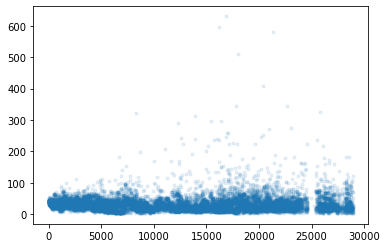

In [52]:
plt.plot(a.loc[:,0], '.', alpha=0.1)
# plt.ylim(0,1)